# Analysis on Udemy Dataset

In [1]:
#!pip install pyspark

# Data cleanup of the files course_info.csv and Comments.csv

In [2]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

In [3]:
spark = SparkSession.builder.getOrCreate()
sc=spark.sparkContext
print(sc)

<SparkContext master=local[*] appName=pyspark-shell>


In [4]:
# Define schema for Udemy Course Info
course_info = StructType([
StructField("id", StringType(), True),
StructField("title", StringType(), True), 
StructField("is_paid", StringType(), True),
StructField("price", StringType(), True),
StructField("headline", StringType(), True),
StructField("num_subscribers", StringType(), True),
StructField("avg_rating", StringType(), True),
StructField("num_reviews", StringType(), True),
StructField("num_comments", StringType(), True),
StructField("num_lectures", StringType(), True),
StructField("content_length_min", StringType(), True),
StructField("published_time", StringType(), True),
StructField("last_update_date", StringType(), True),
StructField("category", StringType(), True),
StructField("subcategory", StringType(), True), 
StructField("topic", StringType(), True),
StructField("language", StringType(), True), 
StructField("course_url", StringType(), True), 
StructField("instructor_name", StringType(), True),
StructField("instructor_url", StringType(), True)])
print(course_info)

StructType([StructField('id', StringType(), True), StructField('title', StringType(), True), StructField('is_paid', StringType(), True), StructField('price', StringType(), True), StructField('headline', StringType(), True), StructField('num_subscribers', StringType(), True), StructField('avg_rating', StringType(), True), StructField('num_reviews', StringType(), True), StructField('num_comments', StringType(), True), StructField('num_lectures', StringType(), True), StructField('content_length_min', StringType(), True), StructField('published_time', StringType(), True), StructField('last_update_date', StringType(), True), StructField('category', StringType(), True), StructField('subcategory', StringType(), True), StructField('topic', StringType(), True), StructField('language', StringType(), True), StructField('course_url', StringType(), True), StructField('instructor_name', StringType(), True), StructField('instructor_url', StringType(), True)])


In [5]:
hdfs_path_course_info = "hdfs://localhost:9000/input/Course_info.csv"
print(hdfs_path_course_info)

hdfs://localhost:9000/input/Course_info.csv


In [6]:
course_info_df = spark.read.csv(hdfs_path_course_info, header=True, inferSchema=True)
course_info_df.show(3)

+------+--------------------+-------+-----+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+---------+----------------+-------------+--------+--------------------+---------------+-----------------+
|    id|               title|is_paid|price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date| category|     subcategory|        topic|language|          course_url|instructor_name|   instructor_url|
+------+--------------------+-------+-----+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+---------+----------------+-------------+--------+--------------------+---------------+-----------------+
|4715.0|Online Vegan Vege...|   True|24.99|Learn to cook del...|         2231.0|      3.75|      134.0|        42.0|        

In [7]:
# Define schema for Udemy Course Comments 
comments = StructType([
StructField("id", StringType(), True),
StructField("course_id", StringType(), True),
StructField("rate", StringType(), True),
StructField("date", StringType(), True),
StructField("display_name", StringType(), True),
StructField("comment", StringType(), True)])
print(comments)

StructType([StructField('id', StringType(), True), StructField('course_id', StringType(), True), StructField('rate', StringType(), True), StructField('date', StringType(), True), StructField('display_name', StringType(), True), StructField('comment', StringType(), True)])


In [8]:
course_info_df.count()

209734

In [9]:
# Convert the number fields from string to integer 
course_info_df = course_info_df.withColumn("id", col("id").cast("integer"))
course_info_df = course_info_df.withColumn("num_subscribers", col("num_subscribers").cast("integer"))
course_info_df = course_info_df.withColumn("num_reviews", col("num_reviews").cast("integer"))
course_info_df = course_info_df.withColumn("num_comments", col("num_comments").cast("integer"))
course_info_df = course_info_df.withColumn("num_lectures", col("num_lectures").cast("integer"))
course_info_df = course_info_df.withColumn("content_length_min", col("content_length_min").cast("integer"))

In [10]:
# Convert the decimal fields from string to double 
course_info_df = course_info_df.withColumn("price", col("price").cast("double"))
course_info_df = course_info_df.withColumn("avg_rating", col("avg_rating").cast("double"))

In [11]:
course_info_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- is_paid: string (nullable = true)
 |-- price: double (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- content_length_min: integer (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- course_url: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- instructor_url: string (nullable = true)



In [12]:
Columns=["id","title","is_paid","price","headline","num_subscribers","avg_rating","num_reviews", "num_comments", "num_lectures",
         "content_length_min", "published_time", "last_update_date", "category","subcategory","topic","language","course_url","instructor_name","instructor_url"]
course_info_df.select([count(when(col(c).isNull(), c)).alias(c) for c in Columns]).show()

+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
| id|title|is_paid|price|headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|published_time|last_update_date|category|subcategory|topic|language|course_url|instructor_name|instructor_url|
+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
|  0|    0|      0|   42|      27|            294|       118|         47|          19|           5|                 1|             1|             138|       1|          1|  959|       1|         1|              6|           428|
+---+-----+-------+-----+--------+---------------+----------+-----------+-----------

In [13]:
course_info_df=course_info_df.dropna("any")
# Check if all the null values are removed from the dataframe
course_info_df.select([count(when(col(c).isNull(), c)).alias(c) for c in Columns]).show()

+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
| id|title|is_paid|price|headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|published_time|last_update_date|category|subcategory|topic|language|course_url|instructor_name|instructor_url|
+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
|  0|    0|      0|    0|       0|              0|         0|          0|           0|           0|                 0|             0|               0|       0|          0|    0|       0|         0|              0|             0|
+---+-----+-------+-----+--------+---------------+----------+-----------+-----------

In [14]:
# Count after data cleanup
course_info_df.count()

207888

##### Comments.csv data cleanup :

In [15]:
# Define schema for Udemy Course Comments 
comments = StructType([
StructField("id", StringType(), True),
StructField("course_id", StringType(), True),
StructField("rate", StringType(), True),
StructField("date", StringType(), True),
StructField("display_name", StringType(), True),
StructField("comment", StringType(), True)])
print(comments)

StructType([StructField('id', StringType(), True), StructField('course_id', StringType(), True), StructField('rate', StringType(), True), StructField('date', StringType(), True), StructField('display_name', StringType(), True), StructField('comment', StringType(), True)])


In [16]:
hdfs_path_comments = "hdfs://localhost:9000/input/Comments.csv"
print(hdfs_path_comments)

hdfs://localhost:9000/input/Comments.csv


In [17]:
# Reading the input files from HDFS and putting it in a dataframe 
comments_df = spark.read.csv(hdfs_path_comments, header=True, inferSchema=True)
comments_df.show(3)

+--------------------+---------+----+--------------------+------------+--------------------+
|                  id|course_id|rate|                date|display_name|             comment|
+--------------------+---------+----+--------------------+------------+--------------------+
|            88962892|  3173036| 1.0|2021-06-29T18:54:...|       Rahul|I think a beginne...|
|      Not satisfied.|     NULL|NULL|                NULL|        NULL|                NULL|
|But whatever I le...|     NULL|NULL|                NULL|        NULL|                NULL|
+--------------------+---------+----+--------------------+------------+--------------------+
only showing top 3 rows



In [18]:
comments_df.count()

10813069

In [19]:
comments_df = comments_df.dropna(subset=["course_id"])

In [20]:
# Count after required data cleanup
comments_df.count()

9869377

# Analysis

# 1. Language preference Analysis

In [21]:
# Group the data by the 'language' column and count the number of courses in each language
language_preference = course_info_df.groupBy("language").count().alias("language_count")

# Sort the results by the count in descending order to find the most popular languages
language_preference = language_preference.orderBy(col("count").desc())

# Show the results
#language_preference.show()

i). Languages in which most number of courses have been uploaded:

C:\Users\gaurk\AppData\Local\Temp\ipykernel_10968\2869544908.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_languages_pd['percentage'] = (top_10_languages_pd['count'] / total_courses) * 100


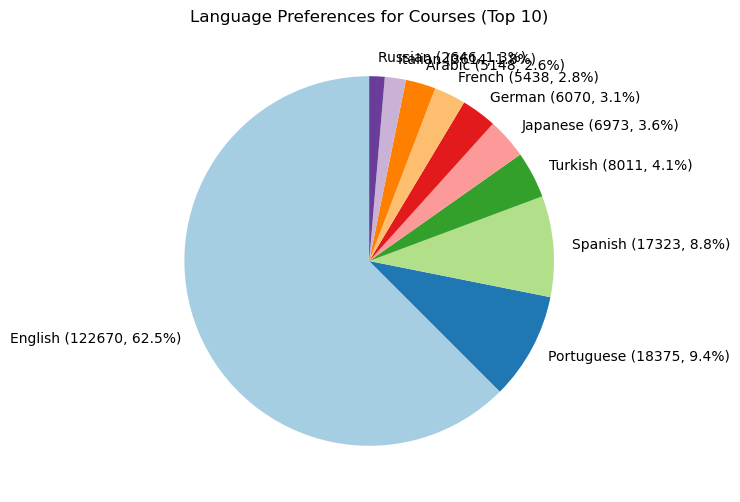

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Convert Spark DataFrame to Pandas DataFrame for plotting
language_preference_pd = language_preference.toPandas()

# Select the top 10 languages
top_10_languages_pd = language_preference_pd.head(10)

# Calculate the percentage of courses for each language
total_courses = top_10_languages_pd['count'].sum()
top_10_languages_pd['percentage'] = (top_10_languages_pd['count'] / total_courses) * 100

# Plotting a pie chart with percentage and number of courses
plt.figure(figsize=(8, 6))
labels = [f"{lang} ({count}, {percentage:.1f}%)"
          for lang, count, percentage in zip(top_10_languages_pd['language'], top_10_languages_pd['count'], top_10_languages_pd['percentage'])]
plt.pie(top_10_languages_pd['count'], labels=labels, autopct='', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Language Preferences for Courses (Top 10)')
plt.show()


ii) Top 5 language preferences for each "Category"

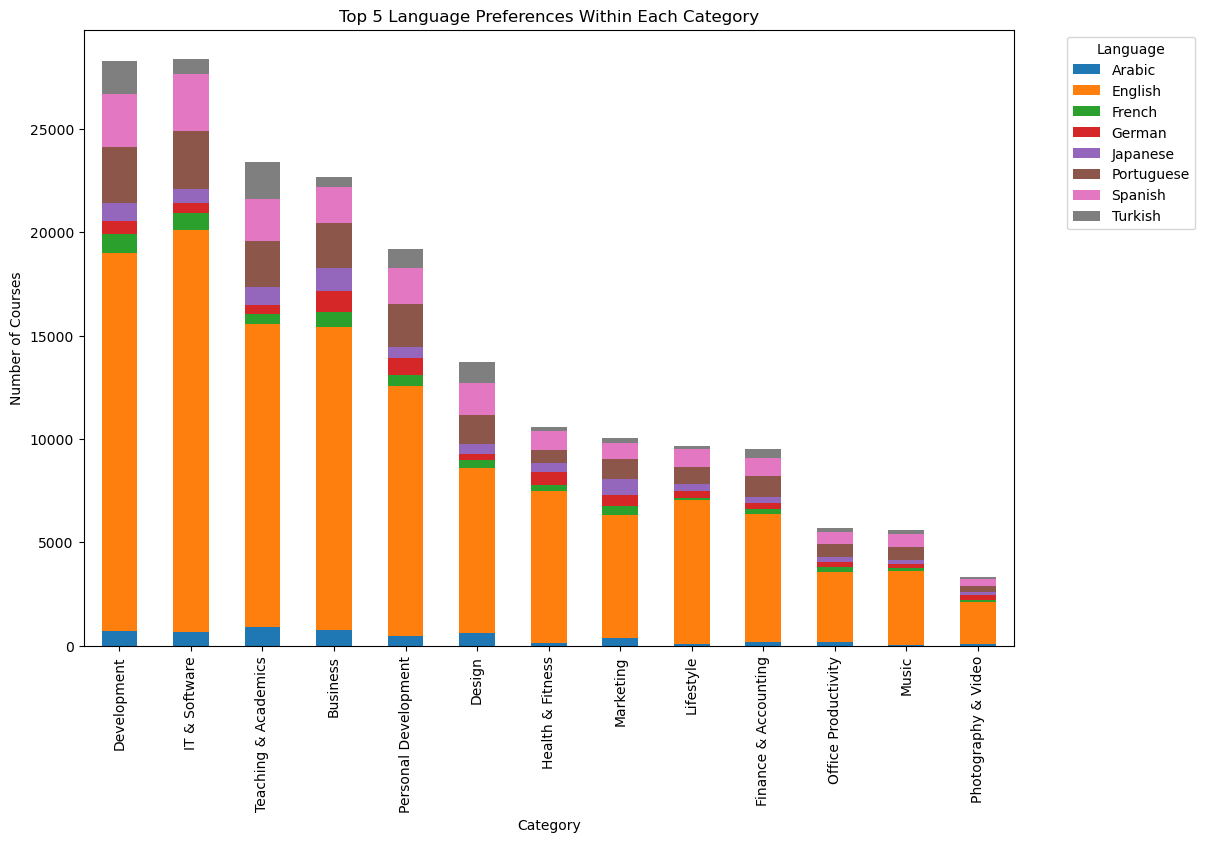

In [23]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt


# Group by 'category' and 'language', then count the number of courses in each group
category_language_counts = course_info_df.groupBy(['category', 'language']).agg(count('*').alias('course_count'))

# Pivot the table to have 'category' as rows, 'language' as columns, and 'course_count' as values
category_language_pivot = category_language_counts.groupBy('category').pivot('language').sum('course_count').fillna(0)

# Convert the PySpark DataFrame to a Pandas DataFrame for sorting and plotting
category_language_pandas = category_language_pivot.toPandas()

# Set 'category' column as the index
category_language_pandas.set_index('category', inplace=True)

# Exclude non-numeric columns when calculating the total number of courses
#category_language_pandas['total_courses'] = category_language_pandas.drop('total_courses', axis=1).sum(axis=1)
category_language_pandas['total_courses'] = category_language_pandas.sum(axis=1)

# Sort the DataFrame by the total number of courses in descending order
category_language_pandas = category_language_pandas.sort_values(by='total_courses', ascending=False)

# Drop the 'total_courses' column for plotting
category_language_pandas.drop('total_courses', axis=1, inplace=True)

# Convert values to numeric to avoid type mismatch issues
category_language_pandas = category_language_pandas.apply(pd.to_numeric, errors='coerce')

# Select only the top 5 languages for each category based on total course count
top_5_languages_df = category_language_pandas.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)
category_language_pandas_top5 = category_language_pandas[top_5_languages_df.columns]

# Plot a stacked bar chart to visualize the top 5 language preferences within each category
ax = category_language_pandas_top5.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_ylabel('Number of Courses')
ax.set_xlabel('Category')
ax.set_title('Top 5 Language Preferences Within Each Category')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#### Insights:
##### From the overall Language preferance Analysis, we can see that overall English is the most preferred language (62.5%)  followed by portugese, spanish, turkish and japnese for most of all the categories. 

# 2. Course Popularity Analysis

i) Percentage of the Courses that have the highest number of subscribers:

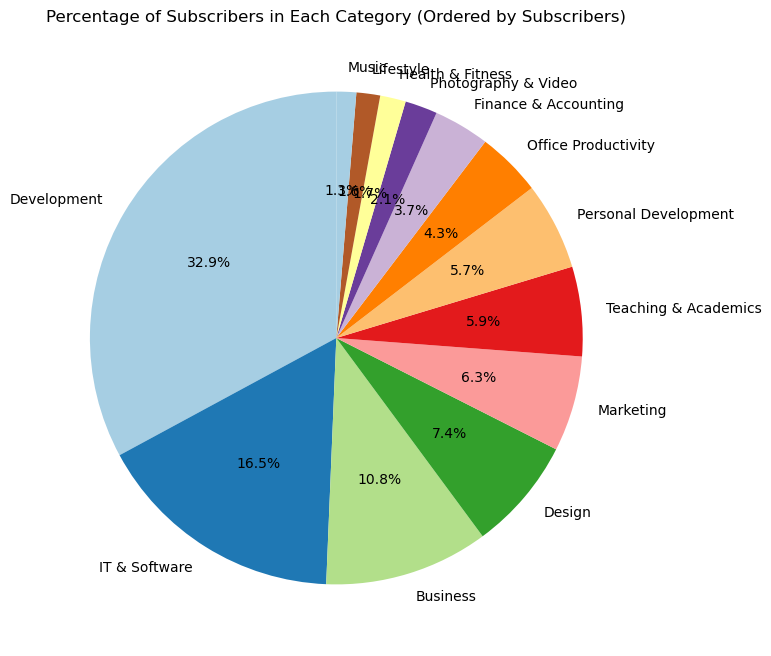

In [24]:
from pyspark.sql.functions import sum

# Group by 'category' and sum the subscribers for each category
category_subscribers = course_info_df.groupBy('category').agg(sum('num_subscribers').alias('total_subscribers'))

# Sort by 'total_subscribers' in descending order
category_subscribers = category_subscribers.orderBy('total_subscribers', ascending=False)

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_category_subscribers = category_subscribers.toPandas()

# Plot the pie chart
plt.figure(figsize=(10,8))
plt.pie(pandas_category_subscribers['total_subscribers'], labels=pandas_category_subscribers['category'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Subscribers in Each Category (Ordered by Subscribers)')
plt.show()


ii) Distribution of Average Course Prices for Each Category

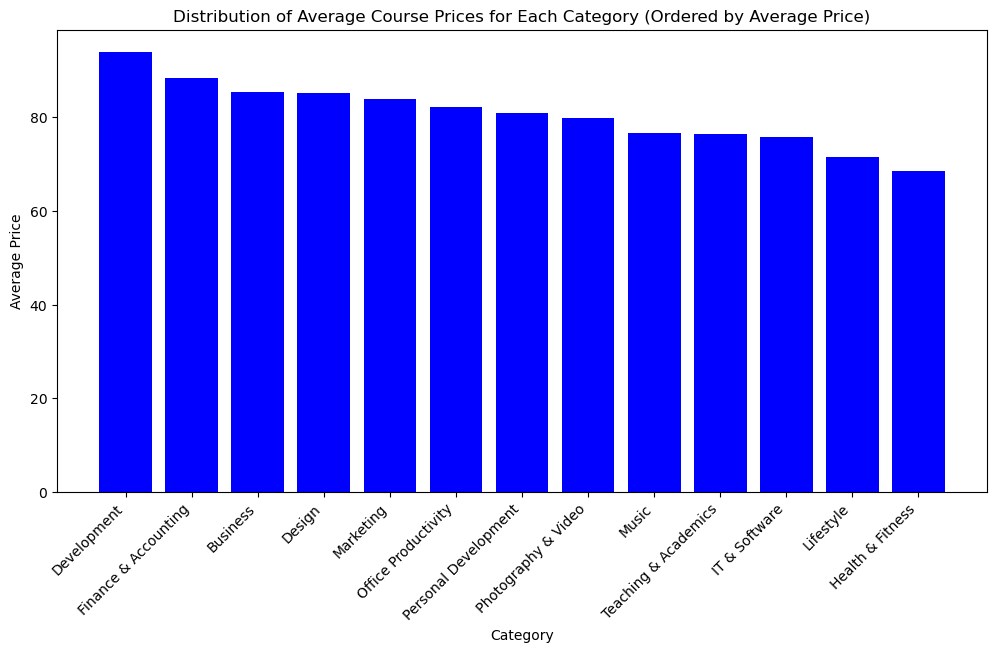

In [25]:
from pyspark.sql.functions import mean
import pandas as pd

# Group by 'category' and calculate the mean price for each category
category_price_stats = course_info_df.groupBy('category').agg(mean('price').alias('average_price'))

# Convert PySpark DataFrame to Pandas for plotting
pandas_category_price_stats = category_price_stats.toPandas()

# Order the DataFrame by 'average_price' in descending order
pandas_category_price_stats = pandas_category_price_stats.sort_values(by='average_price', ascending=False)

# Plot the distribution of course prices for each category
plt.figure(figsize=(12, 6))
plt.bar(pandas_category_price_stats['category'], pandas_category_price_stats['average_price'], color='blue')
plt.title('Distribution of Average Course Prices for Each Category (Ordered by Average Price)')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()


iii) Distribution of Average Course Prices for Each Subcategory in each Category

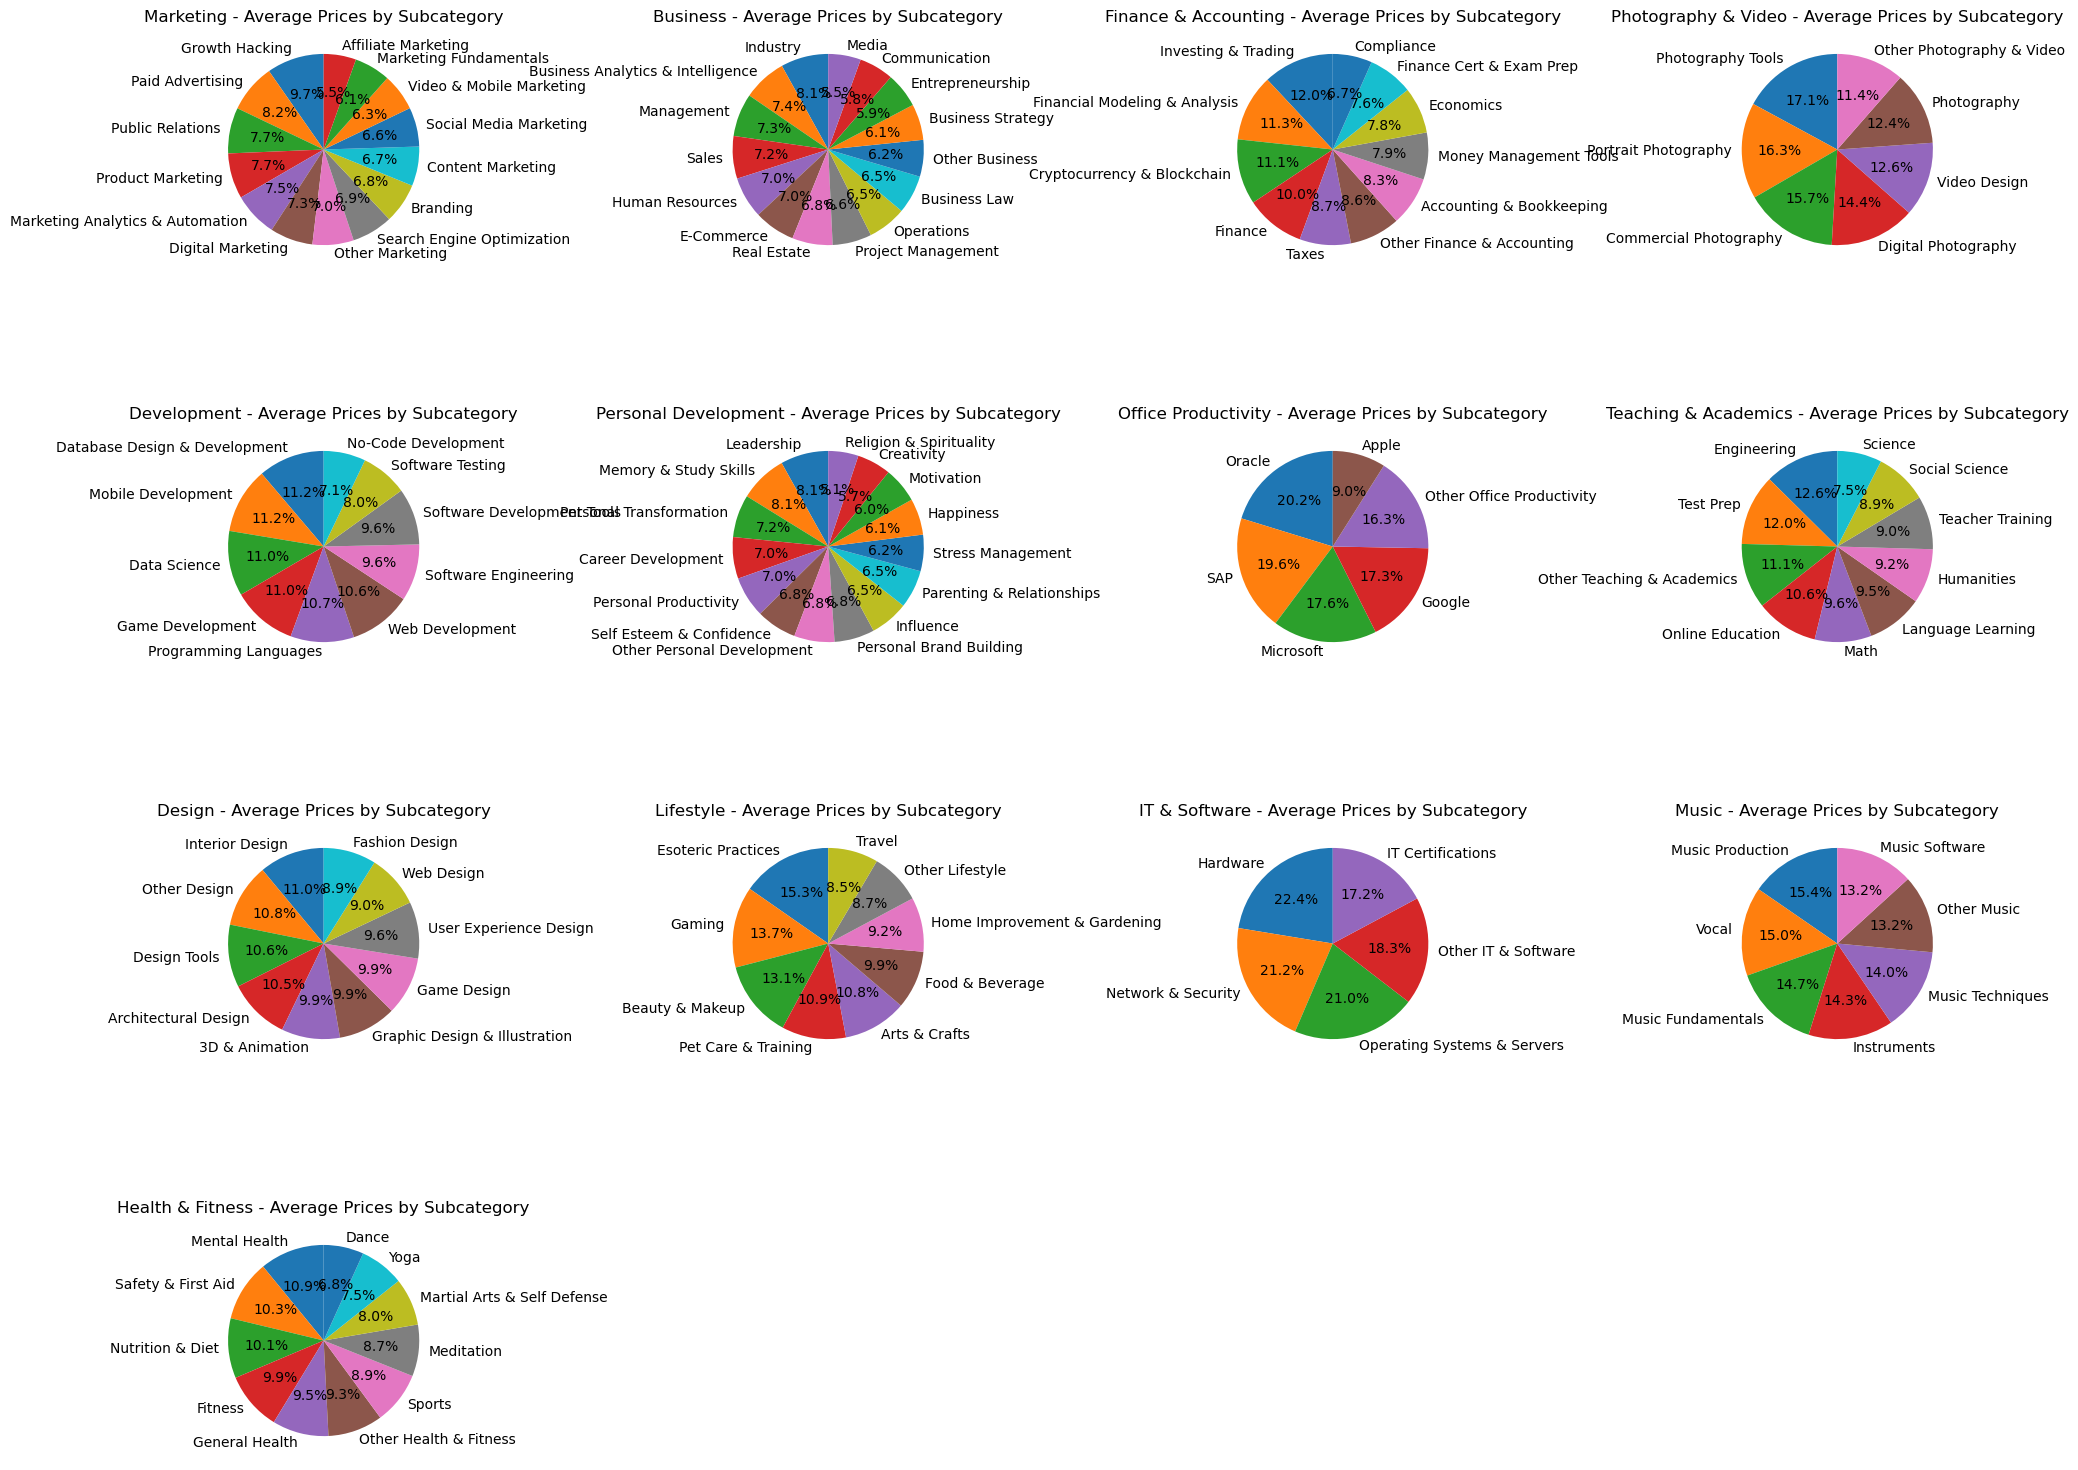

In [26]:
from pyspark.sql.functions import mean
import pandas as pd

# Group by 'category', 'subcategory' and calculate the mean price for each subcategory within each category
subcategory_price_stats = course_info_df.groupBy('category', 'subcategory').agg(mean('price').alias('average_price'))

# Convert PySpark DataFrame to Pandas for plotting
pandas_subcategory_price_stats = subcategory_price_stats.toPandas()

# Order the DataFrame by 'average_price' in descending order
pandas_subcategory_price_stats = pandas_subcategory_price_stats.sort_values(by='average_price', ascending=False)

# Get unique categories
categories = pandas_subcategory_price_stats['category'].unique()

# Plot pie charts for each category
plt.figure(figsize=(20, 20))
for i, category in enumerate(categories, 1):
    plt.subplot(5, 4, i)
    subcategory_data = pandas_subcategory_price_stats[pandas_subcategory_price_stats['category'] == category]
    labels = subcategory_data['subcategory']
    sizes = subcategory_data['average_price']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'{category} - Average Prices by Subcategory')

plt.tight_layout()
plt.show()


#### Insights:
##### From overall Course popularity analysis, we can conclude that: 
##### Courses from Development, IT and software and business categories are the most popular courses, whereas the courses like design, personal development and marketing.
##### Courses related to personal developement, health and fitness and lifestyle are popular in the audience.

##### The overall distribution in the prices in every subcategory doesn't have a drastic difference than another subcategory in all the categories. Which means that for a category, prices for all the courses with various subcategories might have near to similar course prices. 

Correlation between Number of Subscribers and number of reviews: 0.7353929601914677


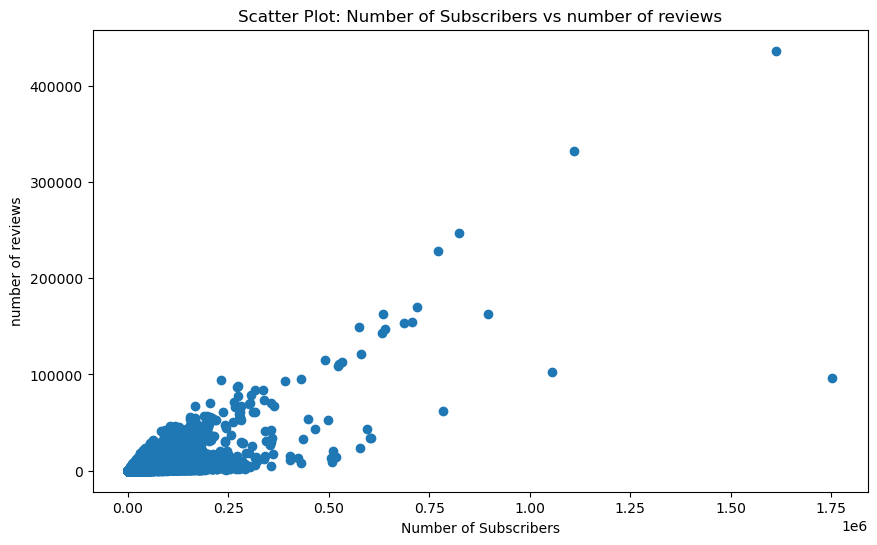

In [27]:
from pyspark.sql.functions import corr
import matplotlib.pyplot as plt

# Select relevant columns
correlation_data = course_info_df.select("num_subscribers", "num_reviews")

# Calculate the correlation between 'num_subscribers' and 'price'
correlation_value = correlation_data.stat.corr("num_subscribers", "num_reviews")

# Print the correlation value
print(f"Correlation between Number of Subscribers and number of reviews: {correlation_value}")

# Plot the scatter plot
pandas_data = correlation_data.toPandas()
plt.figure(figsize=(10, 6))
plt.scatter(pandas_data['num_subscribers'], pandas_data['num_reviews'])
plt.title('Scatter Plot: Number of Subscribers vs number of reviews')
plt.xlabel('Number of Subscribers')
plt.ylabel('number of reviews')
plt.show()


Correlation between Number of Subscribers and Number of lectures: 0.17881797864700497


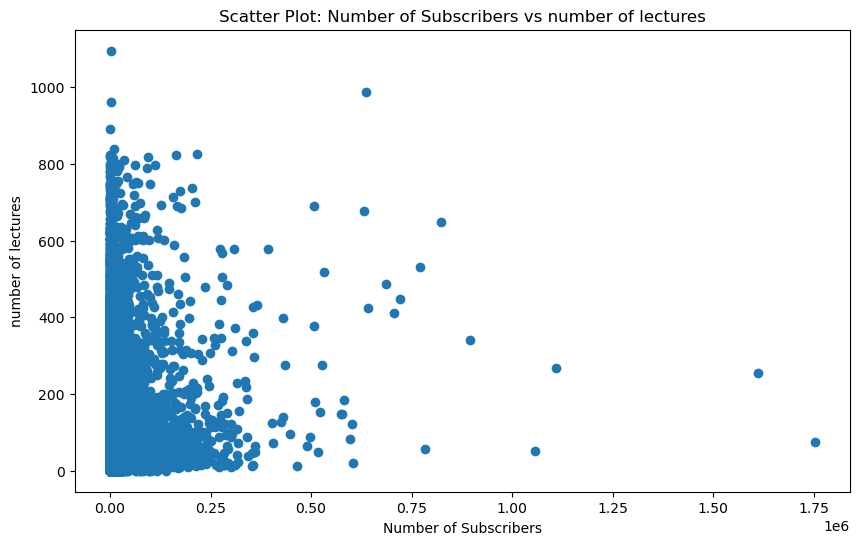

In [28]:
from pyspark.sql.functions import corr
import matplotlib.pyplot as plt

# Select relevant columns
correlation_data = course_info_df.select("num_subscribers", "num_lectures")

# Calculate the correlation between 'num_subscribers' and 'price'
correlation_value = correlation_data.stat.corr("num_subscribers", "num_lectures")

# Print the correlation value
print(f"Correlation between Number of Subscribers and Number of lectures: {correlation_value}")

# Plot the scatter plot
pandas_data = correlation_data.toPandas()
plt.figure(figsize=(10, 6))
plt.scatter(pandas_data['num_subscribers'], pandas_data['num_lectures'])
plt.title('Scatter Plot: Number of Subscribers vs number of lectures')
plt.xlabel('Number of Subscribers')
plt.ylabel('number of lectures')
plt.show()


## 3) Analysis on finding top 5 languages, in which users have given the highest scores for each category:

In [29]:
from pyspark.sql.functions import col, avg, rank
from pyspark.sql.window import Window

# Join dataframes based on comments_df.course_id and course_info_df.id
joined_df = comments_df.join(course_info_df, comments_df.course_id == course_info_df.id, "inner")

# Group by 'language' and 'category', and calculate the average rating for each combination
average_rating_per_language_category = joined_df.groupBy('language', 'category').agg(avg('rate').alias('average_rating'))

# Use window function to rank languages within each category based on average rating
window_spec = Window.partitionBy('category').orderBy(col('average_rating').desc())

# Add a rank column to the DataFrame
ranked_df = (
    average_rating_per_language_category
    .withColumn('rank', rank().over(window_spec))
    .filter(col('rank') <= 6)  # Filter for the top 5 languages in each category
    .orderBy(col('category'), col('rank'))
)

# Select and order the columns according to the desired sequence
result_df = ranked_df.select('category', 'language', 'average_rating')

# Show the result
result_df.show(40)

+--------------------+---------+------------------+
|            category| language|    average_rating|
+--------------------+---------+------------------+
|            Business|  Burmese|               5.0|
|            Business|   Pashto|               5.0|
|            Business|  Kannada|               5.0|
|            Business| Croatian|               5.0|
|            Business|  Latvian|               5.0|
|            Business|Ukrainian|              4.88|
|              Design|    Uzbek|               5.0|
|              Design|Hungarian|               5.0|
|              Design|    Greek|               5.0|
|              Design|  Persian|               5.0|
|              Design|    Azeri|               5.0|
|              Design|  Swahili|               5.0|
|              Design|   Kazakh|               5.0|
|         Development| Albanian|               5.0|
|         Development| Gujarati|               5.0|
|         Development|Afrikaans|               5.0|
|         De

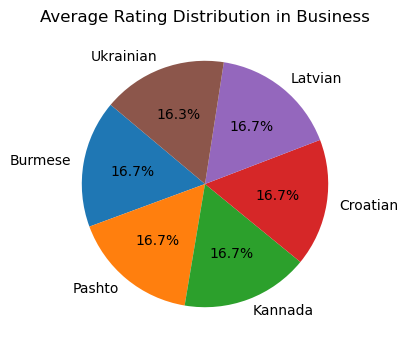

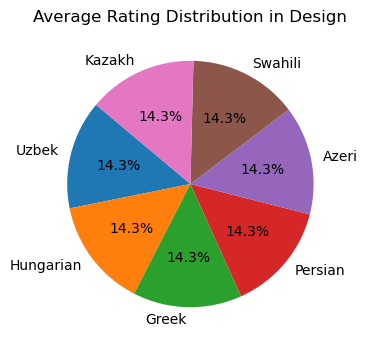

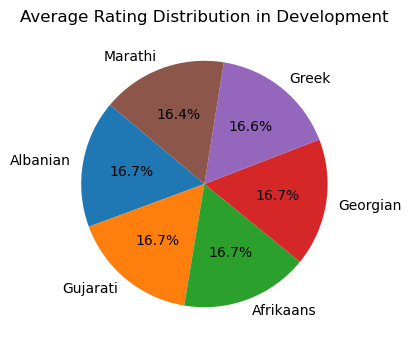

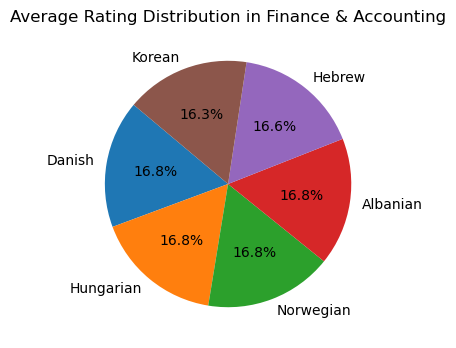

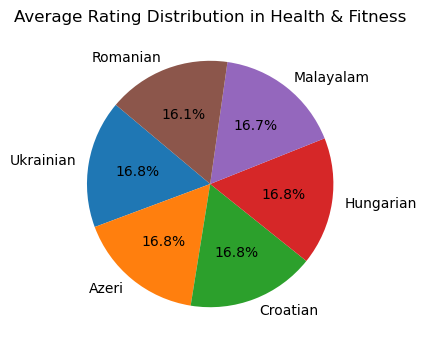

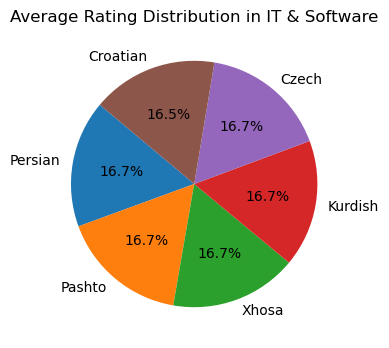

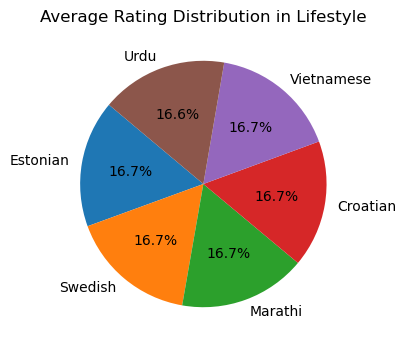

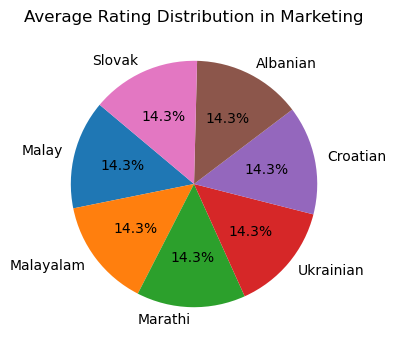

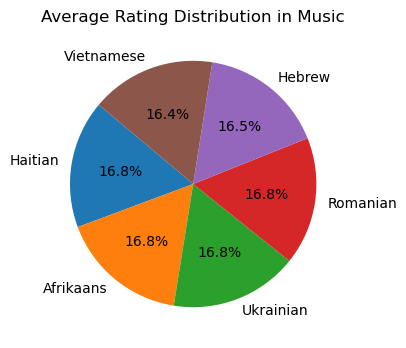

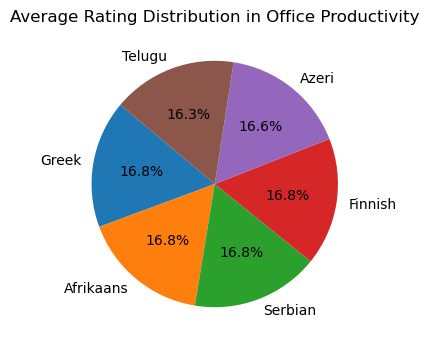

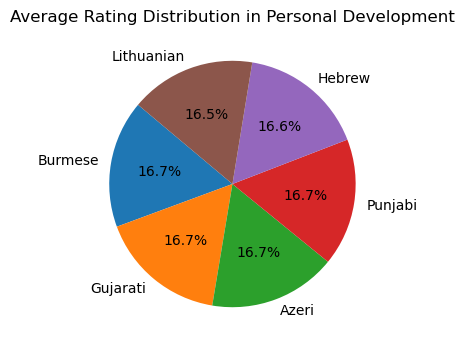

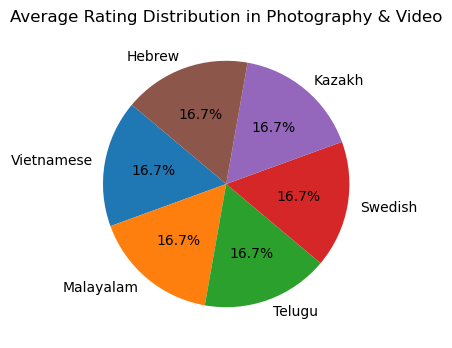

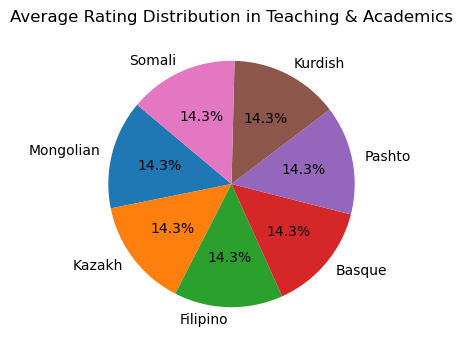

In [30]:
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
result_pandas_df = result_df.toPandas()

# Plot a pie chart for each category with the top 5 languages
categories = result_pandas_df['category'].unique()

for category in categories:
    category_data = result_pandas_df[result_pandas_df['category'] == category]
    
    plt.figure(figsize=(4, 4))
    plt.pie(category_data['average_rating'], labels=category_data['language'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Average Rating Distribution in {category}')
    plt.show()


#### Key Insight:
##### From the analysis, it is clear that even though English is the most popular language among the audience, people have rated other native languages highest ratings.
##### Meaning, people who have taken the courses in their native languages are overall more staisifed with the overall course offerings. 

# 4 PRICE ANALYSIS

+-------+-----------------+
|summary|            price|
+-------+-----------------+
|   mean|81.74064183606065|
|    min|              0.0|
|    25%|            19.99|
|    50%|            34.99|
|    75%|            99.99|
|    max|           999.99|
+-------+-----------------+



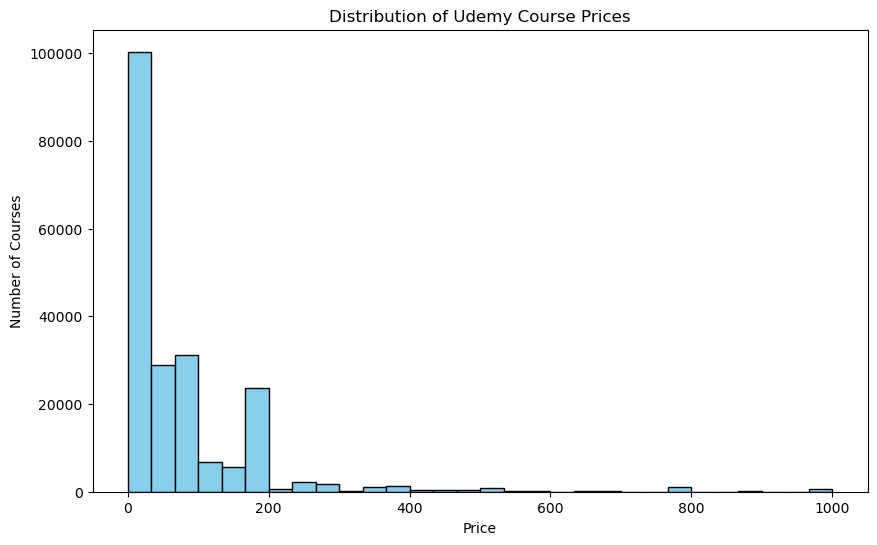

In [31]:
from pyspark.sql.functions import col

# Filter out courses with null prices
filtered_df = course_info_df.filter(col("price").isNotNull())

# Summary statistics of course prices
price_stats = filtered_df.select("price").summary("mean", "min", "25%", "50%", "75%", "max")

# Display summary statistics
price_stats.show()

# Convert DataFrame to Pandas for plotting
prices_pd = filtered_df.select("price").toPandas()

# Plot a histogram of course prices using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(prices_pd["price"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Udemy Course Prices")
plt.xlabel("Price")
plt.ylabel("Number of Courses")
plt.show()


Visualizing Price Distribution:
creating a boxplot to visualize course price distribution and identify potential outliers.

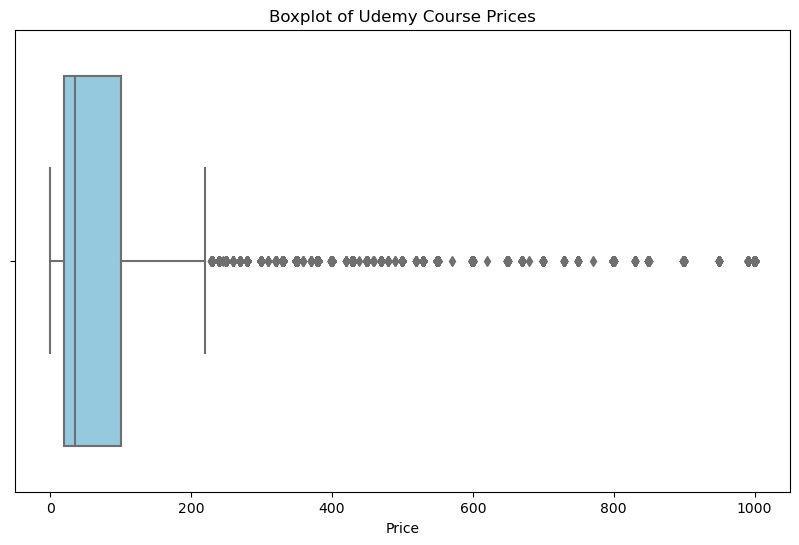

In [32]:
import seaborn as sns
# Convert the Spark DataFrame to a Pandas DataFrame for visualization
price_pd = filtered_df.select("price").toPandas()

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="price", data=price_pd, color='skyblue')
plt.title("Boxplot of Udemy Course Prices")
plt.xlabel("Price")
plt.show()

Distribution of Prices by Category:
Let's create a bar plot to visualize the mean prices of Udemy courses across different categories.

In [33]:
# Assuming you have a "category" column
category_price_stats = filtered_df.groupBy("category").agg(
    mean("price").alias("mean_price"),
    stddev("price").alias("stddev_price")
)

category_price_stats.show()

+--------------------+-----------------+------------------+
|            category|       mean_price|      stddev_price|
+--------------------+-----------------+------------------+
| Photography & Video|79.77863316844605|112.34456098284494|
|       IT & Software|75.85090830535681| 120.6112422291686|
| Office Productivity|82.27789734569939|115.01803839424976|
|    Health & Fitness|68.58229095674845|102.03560815652023|
|           Marketing|84.01811961206693|113.62490126018804|
|              Design|85.13729066314441|117.27496199104462|
|               Music|76.62172384796584|102.34482348134753|
|Personal Development| 81.0159956340134|116.87334642364915|
|Finance & Accounting|88.44859938896114|123.25517914185608|
|         Development|94.00681637456256|117.79015786821104|
|           Lifestyle|71.62711742424128|  100.316808726102|
|            Business| 85.4815826513874|115.21266578352049|
|Teaching & Academics|76.37646925528712|129.44354773700385|
+--------------------+-----------------+

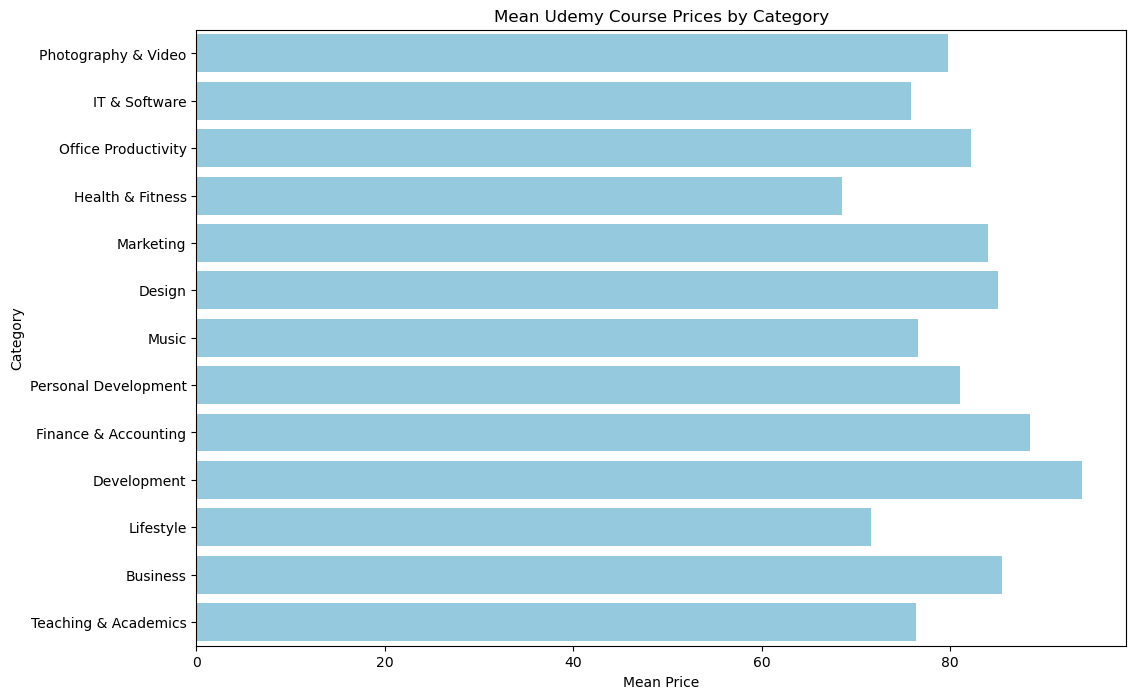

In [34]:
# Convert category_price_stats to Pandas DataFrame for visualization
category_price_pd = category_price_stats.toPandas()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="mean_price", y="category", data=category_price_pd, color='skyblue')
plt.title("Mean Udemy Course Prices by Category")
plt.xlabel("Mean Price")
plt.ylabel("Category")
plt.show()

This plot provides a visual comparison of mean prices for different course categories, allowing you to identify categories with higher or lower average prices.

Analyzing Price Distribution:
You can further analyze the distribution of prices by computing the skewness and kurtosis.

In [35]:
from pyspark.sql.functions import skewness, kurtosis

# Calculate skewness and kurtosis of the price column
skewness_value = filtered_df.select(skewness("price")).collect()[0][0]
kurtosis_value = filtered_df.select(kurtosis("price")).collect()[0][0]

print(f"Skewness of Price: {skewness_value}")
print(f"Kurtosis of Price: {kurtosis_value}")

Skewness of Price: 3.727445418498744
Kurtosis of Price: 19.653200638242957


Analyzing Price Distribution by Category:
If your dataset includes a "category" column, you can analyze the distribution of prices within different categories.

In [36]:
category_price_stats = filtered_df.groupBy("category").agg(
    mean("price").alias("mean_price"),
    stddev("price").alias("stddev_price")
)

category_price_stats.show()

+--------------------+-----------------+------------------+
|            category|       mean_price|      stddev_price|
+--------------------+-----------------+------------------+
| Photography & Video|79.77863316844605|112.34456098284494|
|       IT & Software|75.85090830535681| 120.6112422291686|
| Office Productivity|82.27789734569939|115.01803839424976|
|    Health & Fitness|68.58229095674845|102.03560815652023|
|           Marketing|84.01811961206693|113.62490126018804|
|              Design|85.13729066314441|117.27496199104462|
|               Music|76.62172384796584|102.34482348134753|
|Personal Development| 81.0159956340134|116.87334642364915|
|Finance & Accounting|88.44859938896114|123.25517914185608|
|         Development|94.00681637456256|117.79015786821104|
|           Lifestyle|71.62711742424128|  100.316808726102|
|            Business| 85.4815826513874|115.21266578352049|
|Teaching & Academics|76.37646925528712|129.44354773700385|
+--------------------+-----------------+

visualize the distribution of prices and overlay it with a normal distribution for comparison.

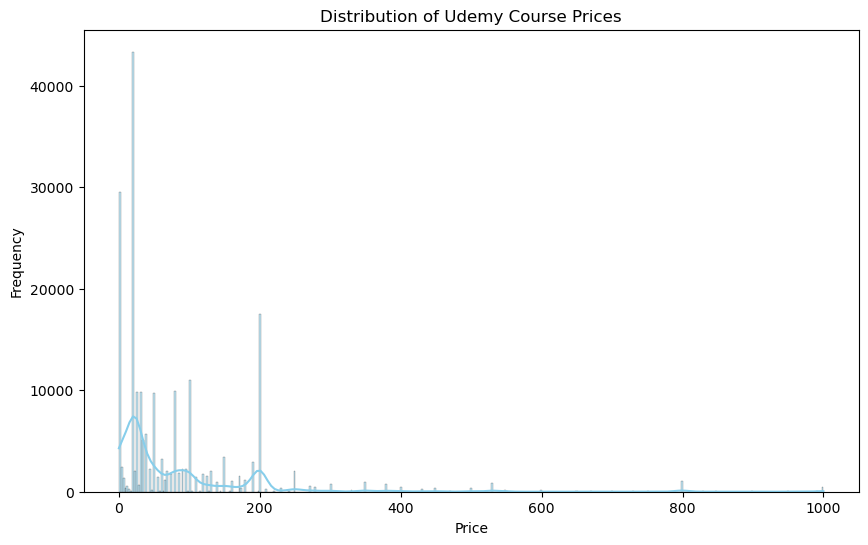

In [37]:
from pyspark.sql.functions import col, expr

# Filter out courses with null prices
filtered_df = course_info_df.filter(col("price").isNotNull())

# Convert the price column to a numeric type
filtered_df = filtered_df.withColumn("price", col("price").cast("double"))

# Convert PySpark DataFrame to Pandas DataFrame for plotting
price_pd = filtered_df.select("price").toPandas()

# Plot the distribution of prices using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.histplot(price_pd['price'], kde=True, color='skyblue')
plt.title("Distribution of Udemy Course Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

This code filters out null prices, converts the "price" column to a double type, and then converts the PySpark DataFrame to a Pandas DataFrame for plotting. The sns.histplot function is then used to create a histogram with a kernel density estimate (KDE).

# 5. RATING AND REVIEWS ANALYSIS

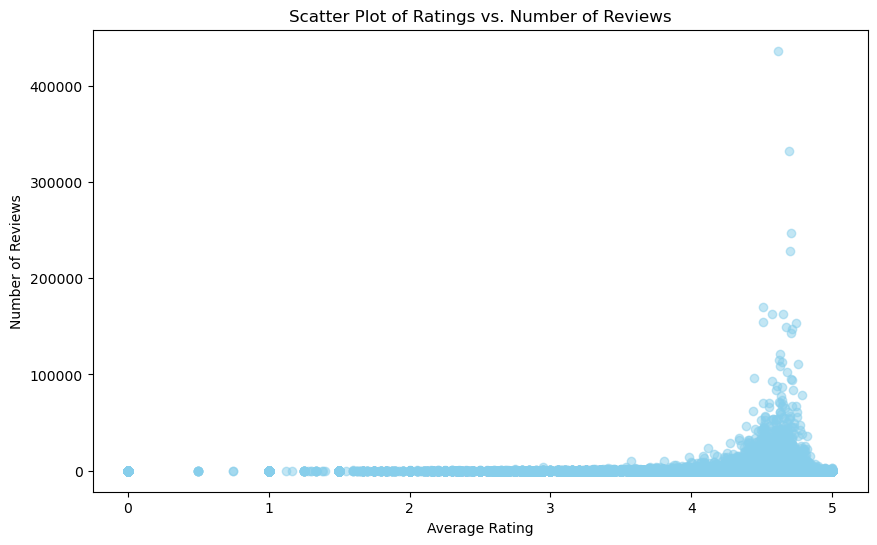

In [38]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Filter out courses with null ratings and reviews
filtered_ratings_df = course_info_df.filter(col("avg_rating").isNotNull() & col("num_reviews").isNotNull())

# Convert the rating and review columns to numeric types
filtered_ratings_df = filtered_ratings_df.withColumn("avg_rating", col("avg_rating").cast("double"))
filtered_ratings_df = filtered_ratings_df.withColumn("num_reviews", col("num_reviews").cast("integer"))

# Summary statistics of ratings and reviews
ratings_stats = filtered_ratings_df.summary("mean", "min", "25%", "50%", "75%", "max")
#ratings_stats.show()

# Scatter plot of ratings vs. number of reviews
avg_rating_values = filtered_ratings_df.select("avg_rating").collect()
num_reviews_values = filtered_ratings_df.select("num_reviews").collect()

plt.figure(figsize=(10, 6))
plt.scatter(avg_rating_values, num_reviews_values, color='skyblue', alpha=0.5)
plt.title("Scatter Plot of Ratings vs. Number of Reviews")
plt.xlabel("Average Rating")
plt.ylabel("Number of Reviews")
plt.show()

Distribution of Average Ratings:
Create a histogram to visualize the distribution of average ratings.

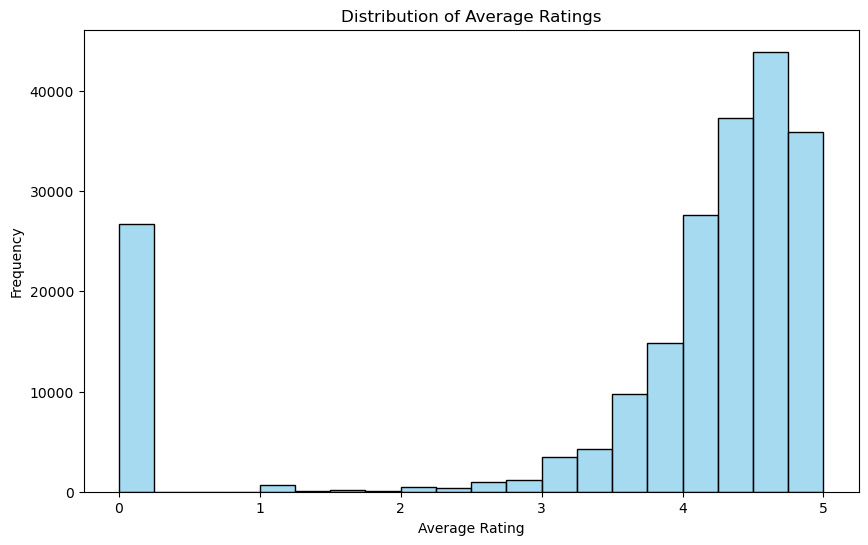

In [39]:
# Convert the PySpark DataFrame to a Pandas DataFrame for visualization
ratings_pd = filtered_ratings_df.select("avg_rating").toPandas()

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_pd['avg_rating'], bins=20, color='skyblue')
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

This histogram provides insights into the distribution of average ratings, including the frequency of different rating levels.

Relationship Between Average Ratings and Number of Reviews:
Create a scatter plot with a regression line to visualize the relationship between average ratings and the number of reviews.

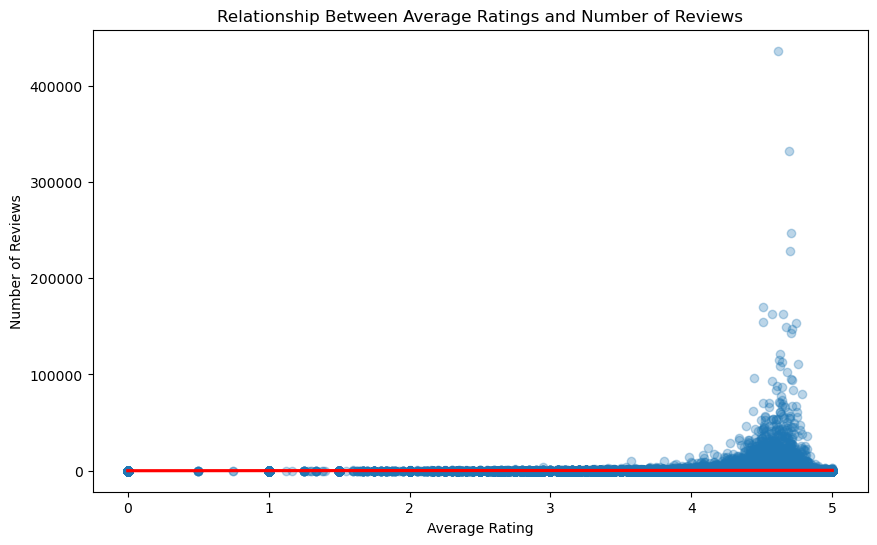

In [40]:
# Convert the PySpark DataFrame to a Pandas DataFrame for visualization
scatter_pd = filtered_ratings_df.select("avg_rating", "num_reviews").toPandas()

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_rating', y='num_reviews', data=scatter_pd, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Relationship Between Average Ratings and Number of Reviews")
plt.xlabel("Average Rating")
plt.ylabel("Number of Reviews")
plt.show()


This scatter plot with a regression line helps visualize the potential correlation between average ratings and the number of reviews.

Analyzing the Most Reviewed Courses:
Identify and display information about the courses with the highest number of reviews.

In [41]:
# Find courses with the highest number of reviews
top_reviewed_courses = filtered_ratings_df.orderBy(col("num_reviews").desc()).limit(5)

# Show information about the top reviewed courses
top_reviewed_courses.select("title", "avg_rating", "num_reviews").show(truncate=False)

+---------------------------------------------------------+----------+-----------+
|title                                                    |avg_rating|num_reviews|
+---------------------------------------------------------+----------+-----------+
|2022 Complete Python Bootcamp From Zero to Hero in Python|4.6118717 |436457     |
|Microsoft Excel - Excel from Beginner to Advanced        |4.6898375 |332598     |
|The Web Developer Bootcamp 2022                          |4.7088985 |246624     |
|The Complete 2022 Web Development Bootcamp               |4.698089  |228108     |
|Java Programming Masterclass covering Java 11 & Java 17  |4.5115194 |170478     |
+---------------------------------------------------------+----------+-----------+



This code identifies and displays information about the top 5 courses with the highest number of reviews.

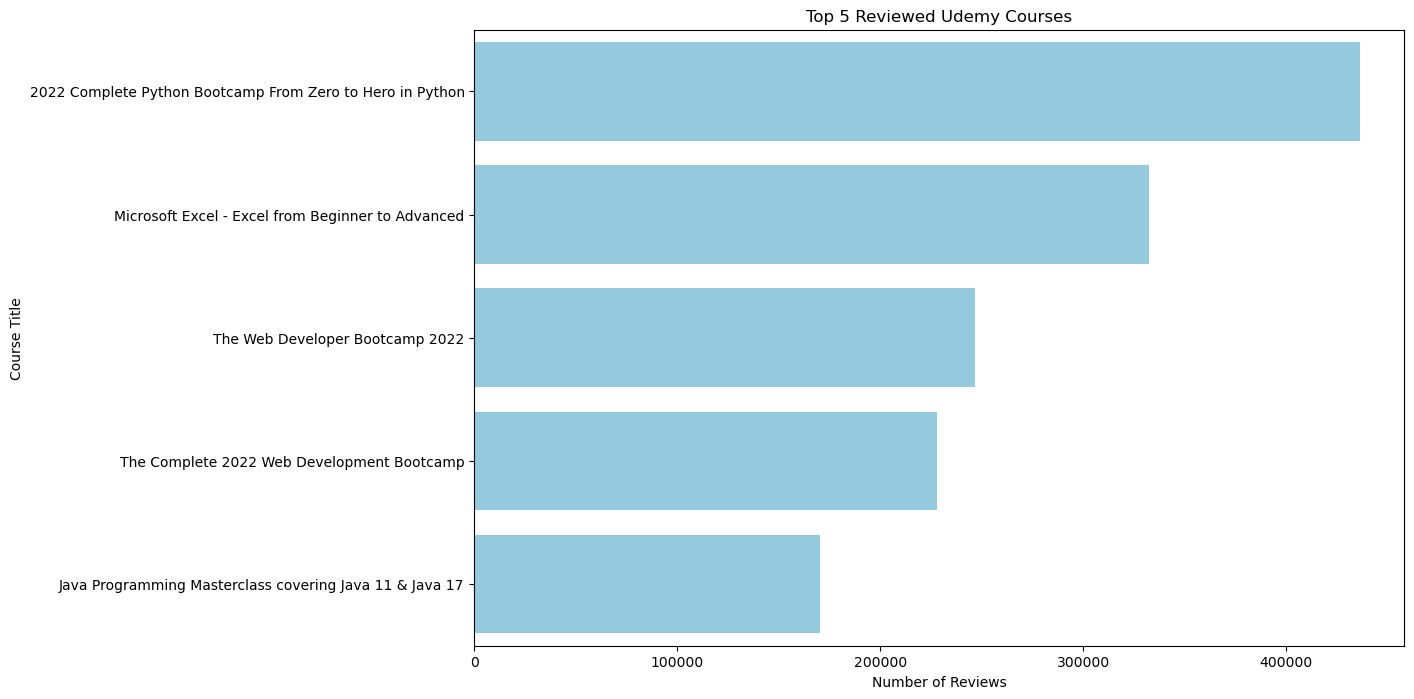

In [42]:
# Convert the PySpark DataFrame to a Pandas DataFrame for visualization
top_reviewed_pd = top_reviewed_courses.toPandas()

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="num_reviews", y="title", data=top_reviewed_pd, color='skyblue')
plt.title("Top 5 Reviewed Udemy Courses")
plt.xlabel("Number of Reviews")
plt.ylabel("Course Title")
plt.show()

This horizontal bar plot provides a visual representation of the top 5 reviewed Udemy courses, showing the number of reviews for each course.

# Instructor Performance Analysis

In [43]:
# Group by instructor and calculate average rating, total subscribers, and total reviews
instructor_performance = course_info_df.groupBy("instructor_name").agg(
    avg("avg_rating").alias("average_rating"),
    sum("num_subscribers").alias("total_subscribers"),
    sum("num_reviews").alias("total_reviews")
)

# Display the results
instructor_performance.show(truncate=False)


+----------------------+------------------+-----------------+-------------+
|instructor_name       |average_rating    |total_subscribers|total_reviews|
+----------------------+------------------+-----------------+-------------+
|Raniel Contreras      |4.491666666666666 |24087            |779          |
|Edo Sa                |3.925             |5127             |213          |
|FAQ Linux             |1.5               |8                |1            |
|Isobyte Training      |4.1499999999999995|1907             |153          |
|Pixtant LLC           |4.2875            |21256            |387          |
|Sean Mitton           |3.2               |1229             |18           |
|Burak Bayram          |4.033333333333334 |16793            |1922         |
|Carlos Javier Roldán  |4.15              |150              |37           |
|Hani Gamal            |4.4977641125      |25342            |2596         |
|John Zapata           |4.3               |292              |15           |
|Heitor Fari

<Figure size 1200x600 with 0 Axes>

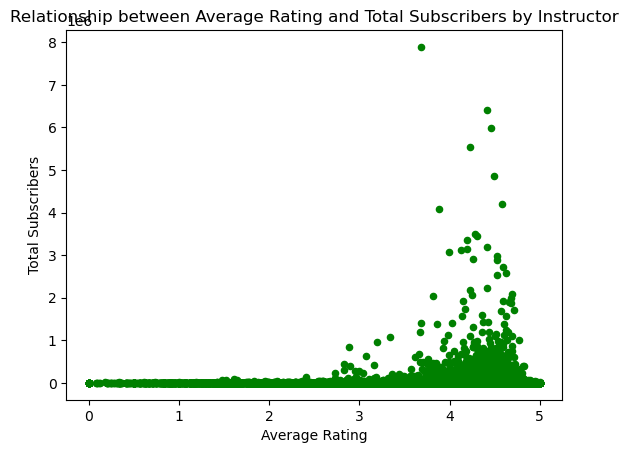

In [44]:
# Visualize the relationship between Average Rating and Total Subscribers
plt.figure(figsize=(12, 6))
instructor_performance.toPandas().plot(
    kind="scatter", x="average_rating", y="total_subscribers", color='green'
)
plt.title("Relationship between Average Rating and Total Subscribers by Instructor")
plt.xlabel("Average Rating")
plt.ylabel("Total Subscribers")
plt.show()


<Figure size 1200x600 with 0 Axes>

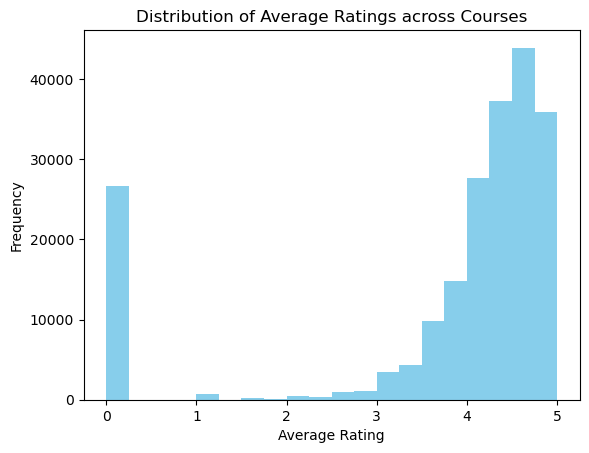

In [45]:
# Visualize the distribution of average ratings across all courses
plt.figure(figsize=(12, 6))
course_info_df.select("avg_rating").toPandas().plot(
    kind="hist", bins=20, legend=False, color='skyblue'
)
plt.title("Distribution of Average Ratings across Courses")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()


In [46]:
# Find the top instructors based on total subscribers
top_instructors = instructor_performance.orderBy(desc("total_subscribers")).limit(5)
top_instructors.show()


+------------------+------------------+-----------------+-------------+
|   instructor_name|    average_rating|total_subscribers|total_reviews|
+------------------+------------------+-----------------+-------------+
|   Learn Tech Plus| 3.680944544210525|          7891011|        55155|
|         TJ Walker| 4.415429377294686|          6406685|       138667|
|       Phil Ebiner| 4.462258040163935|          5995228|       269572|
| YouAccel Training|4.2274747265306125|          5549657|        64838|
|Start-Tech Academy| 4.493084824444444|          4853477|        71178|
+------------------+------------------+-----------------+-------------+



# User Engagement Analysis

In [47]:
from pyspark.sql.functions import avg, col

# Group by 'category', and calculate the average number of subscribers and reviews for each category
engagement_analysis = course_info_df.groupBy('category').agg(
    avg('num_subscribers').alias('avg_subscribers'),
    avg('num_reviews').alias('avg_reviews')
)

engagement_analysis.show()


+--------------------+------------------+------------------+
|            category|   avg_subscribers|       avg_reviews|
+--------------------+------------------+------------------+
| Photography & Video|  3566.66493100755|174.38089039312678|
|       IT & Software|3527.0099704210843|283.61806640300443|
| Office Productivity| 4382.803006076111| 439.6167252958107|
|    Health & Fitness| 950.1940585408475|  68.3305373525557|
|           Marketing| 3626.956088362069| 175.0830639367816|
|              Design|3156.7621247113166|219.52966017815902|
|               Music|1409.5440632357888|115.50353178607467|
|Personal Development|1757.7738230827638|137.41989369779802|
|Finance & Accounting| 2257.118197441283|174.35755203360702|
|         Development| 6746.631985750183| 539.0691179744903|
|           Lifestyle| 949.7919507575757| 94.17831439393939|
|            Business|2843.4643617021275|283.56186579378067|
|Teaching & Academics|1454.7775857433653| 97.26973153589122|
+--------------------+--

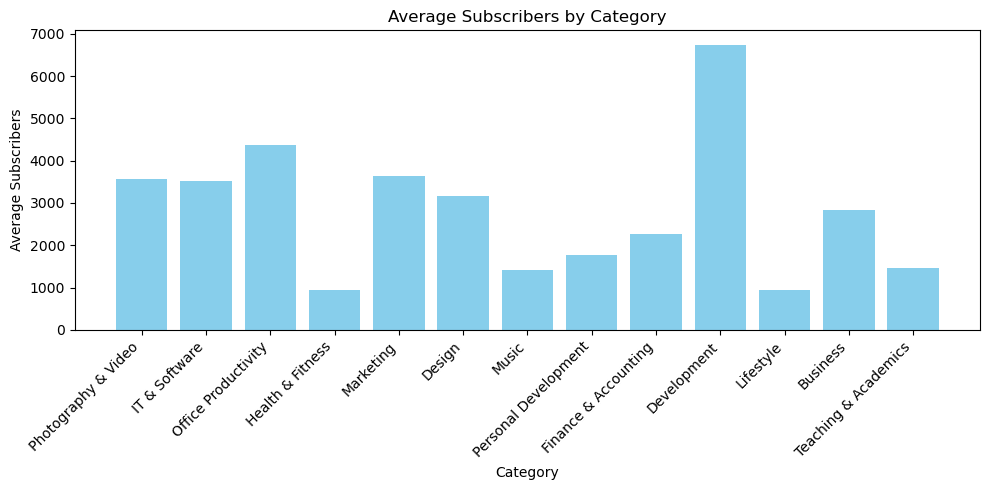

In [48]:
# Average Subscribers Analysis
subscribers_analysis = course_info_df.groupBy("category").agg(avg("num_subscribers").alias("avg_subscribers"))

# Visualize Average Subscribers
subscribers_pd = subscribers_analysis.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(subscribers_pd["category"], subscribers_pd["avg_subscribers"], color='skyblue')
plt.title("Average Subscribers by Category")
plt.xlabel("Category")
plt.ylabel("Average Subscribers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

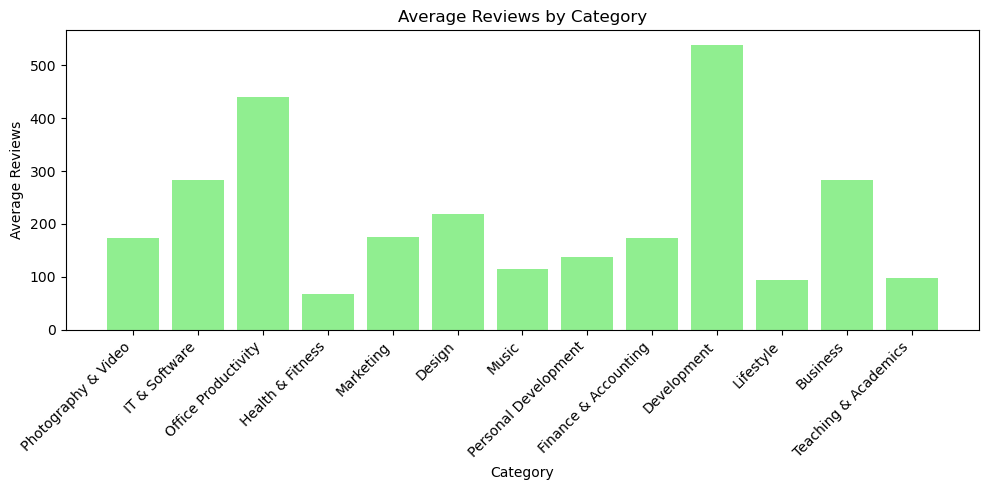

In [49]:
# Average Reviews Analysis
reviews_analysis = course_info_df.groupBy("category").agg(avg("num_reviews").alias("avg_reviews"))

# Visualize Average Reviews
reviews_pd = reviews_analysis.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(reviews_pd["category"], reviews_pd["avg_reviews"], color='lightgreen')
plt.title("Average Reviews by Category")
plt.xlabel("Category")
plt.ylabel("Average Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


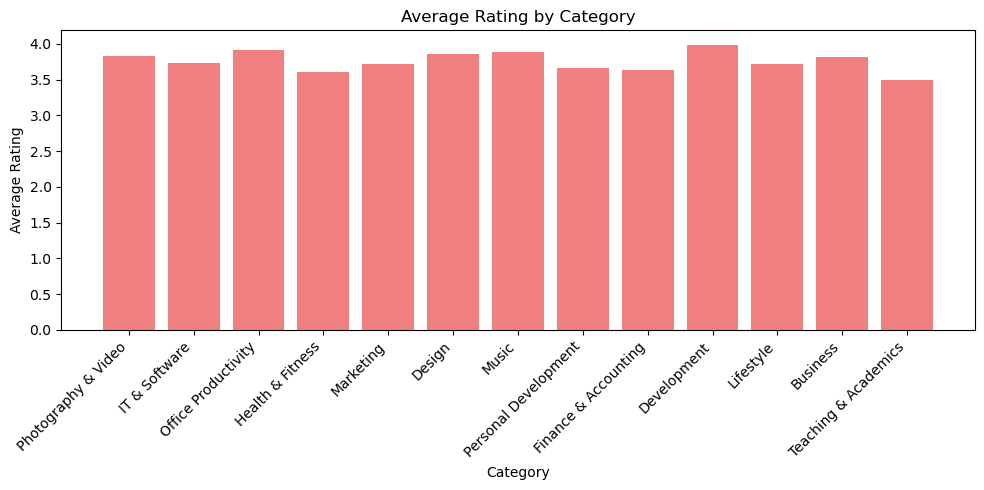

In [50]:
# Average Rating Analysis
rating_analysis = course_info_df.groupBy("category").agg(avg("avg_rating").alias("avg_rating"))

# Visualize Average Rating
rating_pd = rating_analysis.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(rating_pd["category"], rating_pd["avg_rating"], color='lightcoral')
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Machine Learning

In [51]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col

This Spark ML code constructs a logistic regression pipeline for Udemy course pricing prediction, encompassing data preparation, model training, and evaluation using binary classification metrics.

In [52]:
course_info_df = course_info_df.withColumn("num_subscribers", col("num_subscribers").cast("double"))
course_info_df = course_info_df.withColumn("avg_rating", col("avg_rating").cast("double"))
course_info_df = course_info_df.withColumn("num_reviews", col("num_reviews").cast("double"))
course_info_df = course_info_df.withColumn("num_lectures", col("num_lectures").cast("double"))

I have taken specific columns in the course_info_df DataFrame to the "double" data type. These columns are in different data types such as int, float, So I represented them as double-precision floating-point numbers.

In [53]:
# Continue with the model training code
assembler = VectorAssembler(inputCols=["num_subscribers", "avg_rating", "num_reviews", "num_lectures", "content_length_min"],
                            outputCol="features")

label_indexer = StringIndexer(inputCol="is_paid", outputCol="label")

#The code initializes a Spark ML pipeline, assembling features and indexing labels for logistic regression in predicting Udemy course pricing.


In [54]:
lr = LogisticRegression(featuresCol="features", labelCol="label", maxIter=10, regParam=0.01)

pipeline = Pipeline(stages=[assembler, label_indexer, lr])

train_data, test_data = course_info_df.randomSplit([0.8, 0.2], seed=123)

The code configures a logistic regression model with regularization, creates a Spark ML pipeline, and splits data for training and testing.

In [55]:
model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = BinaryClassificationEvaluator()
area_under_curve = evaluator.evaluate(predictions)

print(f"Area Under ROC Curve (AUC): {area_under_curve}")

Area Under ROC Curve (AUC): 0.809718630723531


### Metrics to evaluate the performance of classification models

In [56]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Evaluate AUC
evaluator_auc = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(predictions)
print(f"AUC: {auc}")

# Evaluate precision
evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedPrecision"
)
precision = evaluator_precision.evaluate(predictions)
print(f"Precision: {precision}")

# Evaluate accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator_accuracy.evaluate(predictions)
print(f"Accuracy: {accuracy}")

AUC: 0.809707005232408
Precision: 0.8385364820429899
Accuracy: 0.8940416575948907


### Random Forest Regressor

In [57]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

These lines import necessary PySpark modules and functions for working with machine learning, data preprocessing, and evaluation.

In [58]:
# Drop rows with missing values
course_info_df = course_info_df.dropna()

# Convert "price" column to numerical type
course_info_df = course_info_df.withColumn("price", col("price").cast("double"))


This part of the code assumes you have a DataFrame named course_info_df and performs some preprocessing steps. It drops rows with missing values and converts the "price" column to a numerical type (double).

In [59]:
# Split the data into training and testing sets
(train_data, test_data) = course_info_df.randomSplit([0.8, 0.2], seed=42)

In [60]:
# Taking the independent variables
feature_cols = ['num_subscribers', 'price', 'num_lectures', 'content_length_min']

# I have taken avg_rating as the target variable
target_col = 'avg_rating'

In [61]:
# Create a feature vector by combining the feature columns
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

The VectorAssembler is used to assemble the feature columns into a single feature vector column named 'features' for both training and testing sets.

In [62]:
# Initialising the Random Forest Regressor
rf = RandomForestRegressor(featuresCol='features', labelCol=target_col, numTrees=100)
rf_model = rf.fit(train_data)  # # Fit the model to the training data

In [63]:
# Make predictions on the test data
predictions = rf_model.transform(test_data)

In [64]:
# Evaluate the model using R2 score
evaluator = RegressionEvaluator(labelCol=target_col, predictionCol='prediction', metricName='r2')
r2_score = evaluator.evaluate(predictions)

# Print the R2 score
print(f'R2 Score: {r2_score}')

R2 Score: 0.5726201082194267


The R2 score assesses the proportion of variance in the target variable explained by the model. A higher R2 score (closer to 1) indicates better model fit and predictive power.

# Content Update Analysis 

In [65]:
from pyspark.sql.functions import year

# Select necessary columns
selected_columns = ['id', 'published_time', 'category']

# Extract the year from the published_time column
courses_with_year = course_info_df.withColumn('publish_year', year('published_time'))

# Group by category and year to count the number of courses uploaded every year for each category
courses_per_year_by_category = courses_with_year \
    .groupBy('category', 'publish_year') \
    .agg({'id': 'count'}) \
    .withColumnRenamed('count(id)', 'course_count') \
    .orderBy('category', 'publish_year')

# Show the number of courses uploaded every year for each category
courses_per_year_by_category.show()


+--------+------------+------------+
|category|publish_year|course_count|
+--------+------------+------------+
|Business|        2011|           8|
|Business|        2012|          46|
|Business|        2013|         284|
|Business|        2014|         560|
|Business|        2015|        1086|
|Business|        2016|         969|
|Business|        2017|        1389|
|Business|        2018|        2297|
|Business|        2019|        2533|
|Business|        2020|        5182|
|Business|        2021|        6036|
|Business|        2022|        4050|
|  Design|        2011|           7|
|  Design|        2012|          66|
|  Design|        2013|         244|
|  Design|        2014|         257|
|  Design|        2015|         516|
|  Design|        2016|         596|
|  Design|        2017|        1021|
|  Design|        2018|        1769|
+--------+------------+------------+
only showing top 20 rows



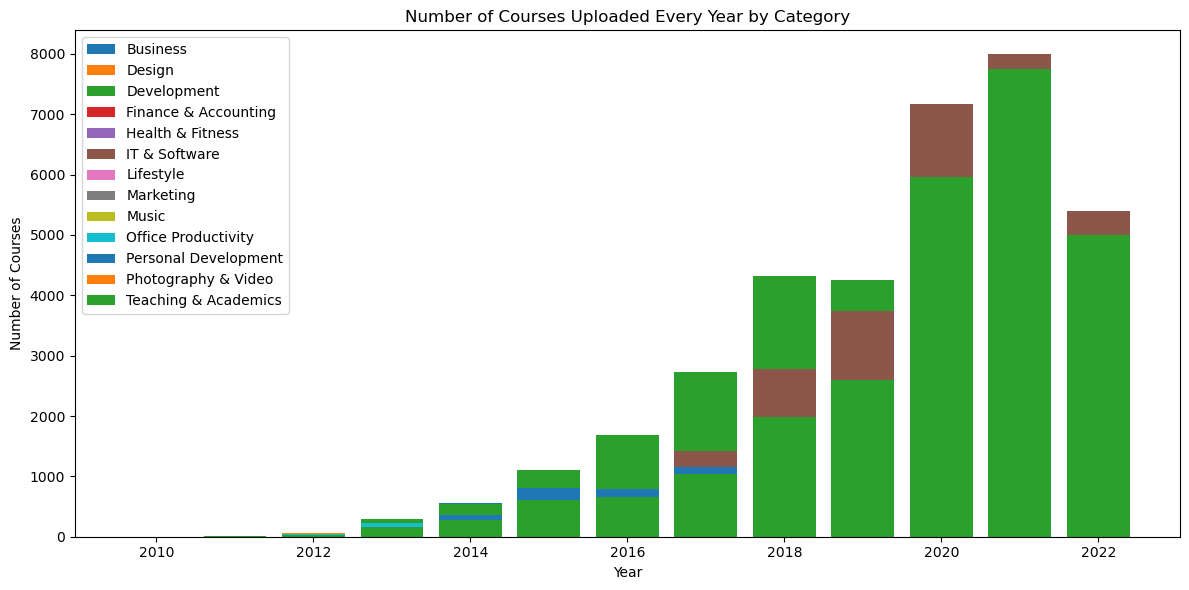

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to Pandas DataFrame for visualization
courses_per_year_by_category_pandas = courses_per_year_by_category.toPandas()

# Plotting the data using a grouped bar chart
plt.figure(figsize=(12, 6))

# Iterate through each category to create separate bars for each category
for category, data in courses_per_year_by_category_pandas.groupby('category'):
    plt.bar(data['publish_year'], data['course_count'], label=category)

plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Uploaded Every Year by Category')
plt.legend()
plt.tight_layout()
plt.show()


In [67]:
print(categories)

['Business' 'Design' 'Development' 'Finance & Accounting'
 'Health & Fitness' 'IT & Software' 'Lifestyle' 'Marketing' 'Music'
 'Office Productivity' 'Personal Development' 'Photography & Video'
 'Teaching & Academics']


In [68]:
from pyspark.sql.functions import count, col

# Select necessary columns
selected_columns = ['id', 'last_update_date', 'category']

# Calculate the count of updated courses for each category
updated_courses_by_category = course_info_df \
    .filter(col('last_update_date').isNotNull()) \
    .groupBy('category') \
    .agg(count('id').alias('updated_course_count')) \
    .orderBy('category')

# Show the number of updated courses for each category
updated_courses_by_category.show()


+--------------------+--------------------+
|            category|updated_course_count|
+--------------------+--------------------+
|            Business|               24440|
|              Design|               15155|
|         Development|               31439|
|Finance & Accounting|               10474|
|    Health & Fitness|               11445|
|       IT & Software|               30089|
|           Lifestyle|               10560|
|           Marketing|               11136|
|               Music|                5946|
| Office Productivity|                6254|
|Personal Development|               21072|
| Photography & Video|                3841|
|Teaching & Academics|               26037|
+--------------------+--------------------+



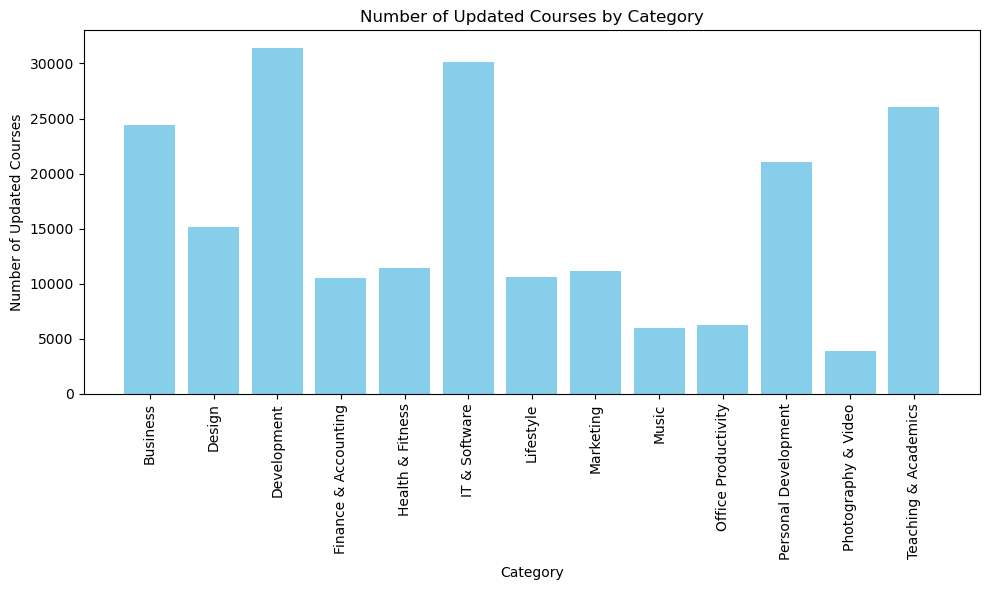

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to Pandas DataFrame for visualization
updated_courses_by_category_pandas = updated_courses_by_category.toPandas()

# Plotting the data using a bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart to show the count of updated courses for each category
plt.bar(updated_courses_by_category_pandas['category'], updated_courses_by_category_pandas['updated_course_count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Updated Courses')
plt.title('Number of Updated Courses by Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


For each category and subcategory, what is the average time duration between course updates

Correlation between the number of updates and the length of the course

Correlation between number of lectures and course content length: 0.7293622611046724


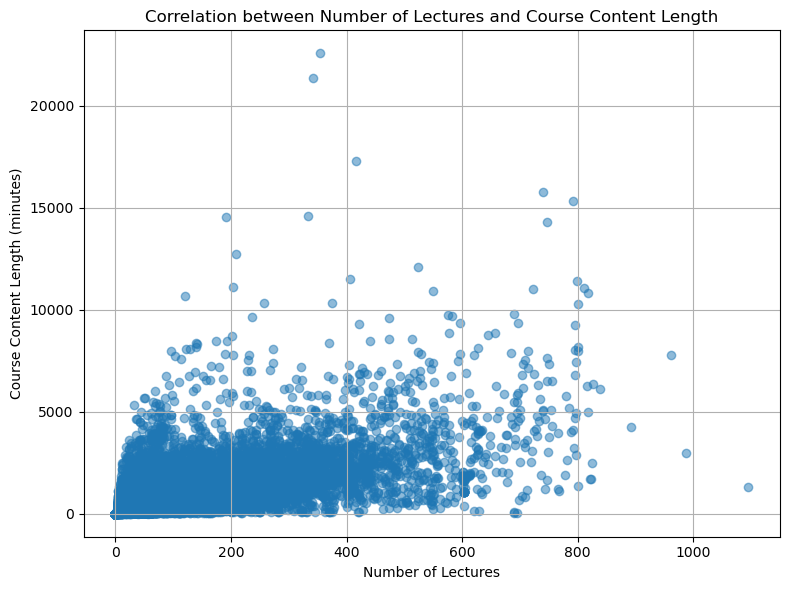

In [70]:
from pyspark.sql.functions import col

# Select necessary columns
selected_columns = ['id', 'num_lectures', 'content_length_min']  # Adjust column names as per your DataFrame

# Calculate the correlation between the number of lectures and course content length
correlation = course_info_df \
    .select('num_lectures', 'content_length_min') \
    .corr('num_lectures', 'content_length_min')

print("Correlation between number of lectures and course content length:", correlation)

# Convert the PySpark DataFrame to Pandas DataFrame for visualization
pandas_df = course_info_df.select('num_lectures', 'content_length_min').toPandas()

# Plotting the correlation using Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(pandas_df['num_lectures'], pandas_df['content_length_min'], alpha=0.5)
plt.xlabel('Number of Lectures')
plt.ylabel('Course Content Length (minutes)')
plt.title('Correlation between Number of Lectures and Course Content Length')
plt.grid(True)
plt.tight_layout()
plt.show()

For each subcategory what is the distribution of updates by different instructors

In [71]:
# Select necessary columns (id, subcategory, last_update_date, instructor_name)
selected_columns = ['id', 'subcategory', 'last_update_date', 'instructor_name']

# Group by subcategory and instructor_name, then count updates for each instructor within each subcategory
updates_by_instructors = course_info_df \
    .groupBy('subcategory', 'instructor_name') \
    .agg({'id': 'count'}) \
    .withColumnRenamed('count(id)', 'update_count') \
    .orderBy('subcategory', 'update_count', ascending=[True, False])

# Show the distribution of updates by instructors within each subcategory
updates_by_instructors.show()


+--------------+--------------------+------------+
|   subcategory|     instructor_name|update_count|
+--------------+--------------------+------------+
|3D & Animation|   Marcello Pattarin|         108|
|3D & Animation|        3dmotive LLC|          60|
|3D & Animation|Nexttut Education...|          49|
|3D & Animation|      Nicolas Forgue|          42|
|3D & Animation|"Luiz Henrique ""...|          40|
|3D & Animation|          Rey3D .com|          35|
|3D & Animation|   Ben-hur Demetrius|          34|
|3D & Animation|           Joe Baily|          29|
|3D & Animation|Mauricio García A...|          26|
|3D & Animation|            3D Tudor|          26|
|3D & Animation|Información De He...|          25|
|3D & Animation|      Muhammed Kosek|          21|
|3D & Animation|2D Animation 101 ...|          20|
|3D & Animation|edugrafia pl wide...|          19|
|3D & Animation|UK Online Trainin...|          18|
|3D & Animation|     AulaGEO Academy|          18|
|3D & Animation|      Julien De